In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_excel('../data/superstore.xls')

In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [11]:
sales_mean = df.groupby('Sub-Category')[['Sales']].mean()

In [12]:
sales_mean.index

Index(['Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases', 'Chairs',
       'Copiers', 'Envelopes', 'Fasteners', 'Furnishings', 'Labels',
       'Machines', 'Paper', 'Phones', 'Storage', 'Supplies', 'Tables'],
      dtype='object', name='Sub-Category')

In [26]:
sales_mean.rename({'Sales' : 'SubcatAvg'},axis = 1, inplace=True)

In [35]:
df = df.merge(sales_mean, left_on ='Sub-Category',right_index=True)

In [38]:
df['PercentDif']=(df['Sales']-df['SubcatAvg'])/df['SubcatAvg']

In [44]:
cust_avgs = df.groupby('Customer Name')['PercentDif'].mean()*100

In [48]:
cust_avgs.sort_values(ascending = False)

Customer Name
Mitch Willingham        672.210825
Christopher Martinez    555.127205
Jenna Caffey            535.085743
Andy Reiter             396.344151
Adrian Barton           396.321356
                           ...    
Lela Donovan            -84.431519
Susan Gilcrest          -84.973073
Cari Schnelling         -85.288547
Mitch Gastineau         -91.917354
Thais Sissman           -98.190708
Name: PercentDif, Length: 793, dtype: float64

In [52]:
profit_mean = df.groupby('Sub-Category')[['Profit']].mean()

In [57]:
profit_mean.rename({'Profit':'ProfitAve'},axis =1,inplace = True)

In [66]:
df = df.merge(profit_mean,left_on='Sub-Category',right_index=True)

In [118]:
df['ProfitDiff'] = (df['Profit'] - df['ProfitAve'])/df['ProfitAve']

In [122]:
custprofitavg = df.groupby('Customer Name')['ProfitDiff'].mean()

In [123]:
custprofitavg.sort_values(ascending = False)

Customer Name
Mitch Willingham        24.040565
Christopher Martinez    18.624369
Jim Radford             16.282799
Andy Reiter             13.739836
Adrian Barton           13.378266
                          ...    
Luke Foster            -12.429651
Paul Knutson           -13.896034
Sharelle Roach         -13.952712
Grant Thornton         -21.260862
Cindy Stewart          -26.713990
Name: ProfitDiff, Length: 793, dtype: float64

In [124]:
stocks = pd.read_csv('../Data/stocks.csv')

In [126]:
stocks.head()

,Date,AAPL,GOOGL,FB,MSFT,AMZN
0,2014-11-05,108.860001,555.950012,74.830002,47.860001,296.519989
1,2014-11-06,108.699997,551.690002,75.260002,48.700001,296.640015
2,2014-11-07,109.010002,551.820007,75.599998,48.680000,299.859985
3,2014-11-10,108.830002,558.229980,75.000000,48.889999,305.109985
4,2014-11-11,109.699997,561.289978,74.610001,48.869999,312.010010


In [128]:
type(stocks['Date'][0])

str

In [130]:
stocks['Date']=pd.to_datetime(stocks['Date'])

In [131]:
stocks.index = stocks['Date']

In [132]:
stocks

,Date,AAPL,GOOGL,FB,MSFT,AMZN
Date,,,,,,
2014-11-05,2014-11-05,108.860001,555.950012,74.830002,47.860001,296.519989
2014-11-06,2014-11-06,108.699997,551.690002,75.260002,48.700001,296.640015
2014-11-07,2014-11-07,109.010002,551.820007,75.599998,48.680000,299.859985
2014-11-10,2014-11-10,108.830002,558.229980,75.000000,48.889999,305.109985
2014-11-11,2014-11-11,109.699997,561.289978,74.610001,48.869999,312.010010
...,...,...,...,...,...,...
2019-10-28,2019-10-28,249.050003,1288.979980,189.399994,144.190002,1777.079956
2019-10-29,2019-10-29,243.289993,1260.660034,189.309998,142.830002,1762.709961
2019-10-30,2019-10-30,243.259995,1260.699951,188.250000,144.610001,1779.989990


In [134]:
stocks.diff(3)

,Date,AAPL,GOOGL,FB,MSFT,AMZN
Date,,,,,,
2014-11-05,NaT,NaN,NaN,NaN,NaN,NaN
2014-11-06,NaT,NaN,NaN,NaN,NaN,NaN
2014-11-07,NaT,NaN,NaN,NaN,NaN,NaN
2014-11-10,5 days,-0.029999,2.279968,0.169998,1.029998,8.589996
2014-11-11,5 days,1.000000,9.599976,-0.650001,0.169998,15.369995
...,...,...,...,...,...,...
2019-10-28,5 days,5.870010,31.349975,3.250000,6.949997,14.909912
2019-10-29,5 days,-0.290009,1.550049,2.929993,2.890000,-18.070068
2019-10-30,5 days,-3.320007,-3.600098,0.360001,3.880005,18.660034


In [138]:
aapl_quaterly =stocks[['AAPL']].resample('Q').last()

In [139]:
aapl_quaterly['QuaterlyDiff'] = aapl_quaterly.diff()

In [140]:
aapl_quaterly

,AAPL,QuaterlyDiff
Date,,
2014-12-31,110.379997,NaN
2015-03-31,124.430000,14.050003
2015-06-30,125.430000,1.000000
2015-09-30,110.300003,-15.129997
2015-12-31,105.260002,-5.040001
2016-03-31,108.989998,3.729996
2016-06-30,95.599998,-13.390000
2016-09-30,113.050003,17.450005
2016-12-31,115.820000,2.769997


In [141]:
stocks

,Date,AAPL,GOOGL,FB,MSFT,AMZN
Date,,,,,,
2014-11-05,2014-11-05,108.860001,555.950012,74.830002,47.860001,296.519989
2014-11-06,2014-11-06,108.699997,551.690002,75.260002,48.700001,296.640015
2014-11-07,2014-11-07,109.010002,551.820007,75.599998,48.680000,299.859985
2014-11-10,2014-11-10,108.830002,558.229980,75.000000,48.889999,305.109985
2014-11-11,2014-11-11,109.699997,561.289978,74.610001,48.869999,312.010010
...,...,...,...,...,...,...
2019-10-28,2019-10-28,249.050003,1288.979980,189.399994,144.190002,1777.079956
2019-10-29,2019-10-29,243.289993,1260.660034,189.309998,142.830002,1762.709961
2019-10-30,2019-10-30,243.259995,1260.699951,188.250000,144.610001,1779.989990


In [142]:
stocks.shift()

,Date,AAPL,GOOGL,FB,MSFT,AMZN
Date,,,,,,
2014-11-05,NaT,NaN,NaN,NaN,NaN,NaN
2014-11-06,2014-11-05,108.860001,555.950012,74.830002,47.860001,296.519989
2014-11-07,2014-11-06,108.699997,551.690002,75.260002,48.700001,296.640015
2014-11-10,2014-11-07,109.010002,551.820007,75.599998,48.680000,299.859985
2014-11-11,2014-11-10,108.830002,558.229980,75.000000,48.889999,305.109985
...,...,...,...,...,...,...
2019-10-28,2019-10-25,246.580002,1264.300049,187.889999,140.729996,1761.329956
2019-10-29,2019-10-28,249.050003,1288.979980,189.399994,144.190002,1777.079956
2019-10-30,2019-10-29,243.289993,1260.660034,189.309998,142.830002,1762.709961


In [145]:
aapl_quaterly['Last'] = aapl_quaterly['AAPL'].shift()

In [146]:
aapl_quaterly

,AAPL,QuaterlyDiff,Last
Date,,,
2014-12-31,110.379997,NaN,NaN
2015-03-31,124.430000,14.050003,110.379997
2015-06-30,125.430000,1.000000,124.430000
2015-09-30,110.300003,-15.129997,125.430000
2015-12-31,105.260002,-5.040001,110.300003
2016-03-31,108.989998,3.729996,105.260002
2016-06-30,95.599998,-13.390000,108.989998
2016-09-30,113.050003,17.450005,95.599998
2016-12-31,115.820000,2.769997,113.050003


In [151]:
aapl_quaterly / aapl_quaterly.shift().cumprod()

,AAPL,QuaterlyDiff,Last
Date,,,
2014-12-31,NaN,NaN,NaN
2015-03-31,1.127288e+00,NaN,NaN
2015-06-30,9.132421e-03,7.117436e-02,1.127288e+00
2015-09-30,6.402633e-05,-1.076868e+00,9.132421e-03
2015-12-31,5.539505e-07,2.370912e-02,6.402633e-05
2016-03-31,5.449176e-09,3.481469e-03,5.539505e-07
2016-06-30,4.385463e-11,-3.350629e-03,5.449176e-09
2016-09-30,5.424632e-13,-3.261075e-04,4.385463e-11
2016-12-31,4.916009e-15,-2.966531e-06,5.424632e-13


In [154]:
stocks = stocks.set_index('Date')

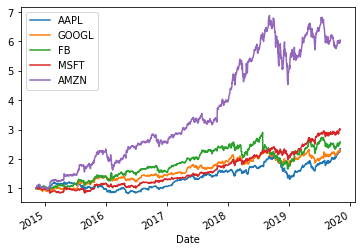

In [157]:
(stocks / stocks.shift()).cumprod().plot()

In [161]:
stocks.index.strftime('%d-%m-%y')

Index(['05-11-14', '06-11-14', '07-11-14', '10-11-14', '11-11-14', '12-11-14',
       '13-11-14', '14-11-14', '17-11-14', '18-11-14',
       ...
       '21-10-19', '22-10-19', '23-10-19', '24-10-19', '25-10-19', '28-10-19',
       '29-10-19', '30-10-19', '31-10-19', '01-11-19'],
      dtype='object', name='Date', length=1257)

In [162]:
stocks.pct_change()

,AAPL,GOOGL,FB,MSFT,AMZN
Date,,,,,
2014-11-05,NaN,NaN,NaN,NaN,NaN
2014-11-06,-0.001470,-0.007663,0.005746,0.017551,0.000405
2014-11-07,0.002852,0.000236,0.004518,-0.000411,0.010855
2014-11-10,-0.001651,0.011616,-0.007936,0.004314,0.017508
2014-11-11,0.007994,0.005482,-0.005200,-0.000409,0.022615
...,...,...,...,...,...
2019-10-28,0.010017,0.019521,0.008037,0.024586,0.008942
2019-10-29,-0.023128,-0.021971,-0.000475,-0.009432,-0.008086
2019-10-30,-0.000123,0.000032,-0.005599,0.012462,0.009803


In [182]:
one_week = pd.DateOffset(weeks=1)

In [183]:
one_week

<DateOffset: weeks=1>

In [184]:
stocks.head()

,AAPL,GOOGL,FB,MSFT,AMZN
Date,,,,,
2014-11-05,108.860001,555.950012,74.830002,47.860001,296.519989
2014-11-06,108.699997,551.690002,75.260002,48.700001,296.640015
2014-11-07,109.010002,551.820007,75.599998,48.680000,299.859985
2014-11-10,108.830002,558.229980,75.000000,48.889999,305.109985
2014-11-11,109.699997,561.289978,74.610001,48.869999,312.010010


In [185]:
stocks2

DatetimeIndex(['2014-10-29', '2014-10-30', '2014-10-31', '2014-11-03',
               '2014-11-04', '2014-11-05', '2014-11-06', '2014-11-07',
               '2014-11-10', '2014-11-11',
               ...
               '2019-10-14', '2019-10-15', '2019-10-16', '2019-10-17',
               '2019-10-18', '2019-10-21', '2019-10-22', '2019-10-23',
               '2019-10-24', '2019-10-25'],
              dtype='datetime64[ns]', name='Date', length=1257, freq=None)

In [209]:
stocks[stocks.index.year==2019]['AMZN'].resample('M').last().pct_change().mean()

0.005647495071858233

In [210]:
one_month = pd.DateOffset(months = 1)

In [211]:
one_month_stocks = stocks['AMZN'].shift(1,freq=one_month)

In [212]:
one_month_stocks.index = stocks.index

In [213]:
one_month_stocks

Date
2014-11-05     296.519989
2014-11-06     296.640015
2014-11-07     299.859985
2014-11-10     305.109985
2014-11-11     312.010010
                 ...     
2019-10-28    1777.079956
2019-10-29    1762.709961
2019-10-30    1779.989990
2019-10-31    1776.660034
2019-11-01    1791.439941
Name: AMZN, Length: 1257, dtype: float64

In [225]:
one_month_stocks[one_month_stocks.index.duplicated()==True]

Series([], Name: AMZN, dtype: float64)

In [230]:
panel_data = pd.read_csv('../data/stocks_panel.csv',parse_dates=['Date'])

In [235]:
panel_data = panel_data.set_index(['Stock','Date']).sort_index(level=0)

In [246]:
panel_data.groupby(level=0)['Price'].shift(4).loc['MSFT']

Date
2014-11-05           NaN
2014-11-06           NaN
2014-11-07           NaN
2014-11-10           NaN
2014-11-11     47.860001
                 ...    
2019-10-28    136.369995
2019-10-29    137.240005
2019-10-30    139.940002
2019-10-31    140.729996
2019-11-01    144.190002
Name: Price, Length: 1257, dtype: float64